## sklearn.metrics

In [2]:
from sklearn import cross_validation, datasets, metrics, linear_model
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [4]:
clf_data, clf_target = datasets.make_classification(n_features=2, n_informative=2, n_classes=2,
                                                   n_redundant=0, n_clusters_per_class=1, random_state=7)

In [7]:
reg_data, reg_target = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, noise=5.,
                                                   random_state=7)

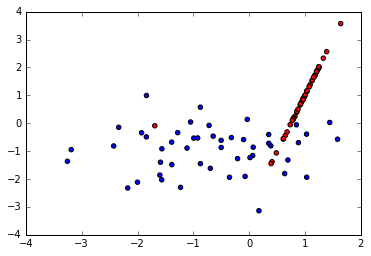

In [8]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(list(map(lambda x: x[0], clf_data)), list(map(lambda x: x[1], clf_data)), c=clf_target, cmap=colors)

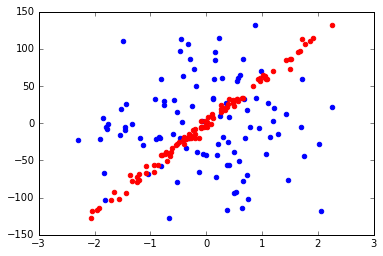

In [12]:
pylab.scatter(list(map(lambda x: x[0], reg_data)), reg_target, color='b')
pylab.scatter(list(map(lambda x: x[1], reg_data)), reg_target, color='r')

In [16]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target, test_size=0.3,
                                                                                                    random_state=1)

In [17]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = cross_validation.train_test_split(reg_data, reg_target, test_size=0.3,
                                                                                                    random_state=1)

## Метрика качества в задачах классификации

### Обучение модели классификации

In [18]:
classifier = linear_model.SGDClassifier(loss='log', random_state=1)

In [19]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=1, shuffle=True, verbose=0,
       warm_start=False)

In [20]:
predictions = classifier.predict(clf_test_data)

In [21]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [22]:
print(clf_test_labels)

[1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1]


In [23]:
print(predictions)

[1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1]


In [24]:
print(probability_predictions)

[[  0.00000000e+00   1.00000000e+00]
 [  9.99998960e-01   1.04025792e-06]
 [  1.71329617e-12   1.00000000e+00]
 [  6.46196016e-01   3.53803984e-01]
 [  9.99999409e-01   5.90969932e-07]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.83959075e-14]
 [  1.00000000e+00   9.29540905e-12]
 [  1.93266100e-07   9.99999807e-01]
 [  1.00000000e+00   5.49586140e-11]
 [  4.48180891e-01   5.51819109e-01]
 [  1.00000000e+00   1.06906773e-11]
 [  0.00000000e+00   1.00000000e+00]
 [  2.05390498e-01   7.94609502e-01]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   8.92836123e-14]
 [  9.99999991e-01   9.07737081e-09]
 [  3.99680289e-15   1.00000000e+00]
 [  8.69483252e-09   9.99999991e-01]
 [  5.05167972e-02   9.49483203e-01]
 [  9.99354091e-01   6.45908892e-04]
 [  9.99999998e-01   2.29195299e-09]
 [  9.99999972e-01   2.76302914e-08]
 [  0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   3.86198487e-12]
 [  6.53272072e-08   9.99999935e-01]
 [  9.99999594e-01   4.06039401e-07]
 

### accuracy

In [26]:
# наша реализация accuracy
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.90000000000000002

In [27]:
metrics.accuracy_score(clf_test_labels, predictions)

0.90000000000000002

### confusion matrix

In [28]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[13  0]
 [ 3 14]]


### precision

In [29]:
metrics.precision_score(clf_test_labels, predictions, pos_label=0)

0.8125

In [30]:
metrics.precision_score(clf_test_labels, predictions, pos_label=1)

1.0

### recall полнота

In [31]:
metrics.recall_score(clf_test_labels, predictions, pos_label=0)

1.0

In [32]:
metrics.recall_score(clf_test_labels, predictions, pos_label=1)

0.82352941176470584

### f1

In [33]:
metrics.f1_score(clf_test_labels, predictions, pos_label=0)

0.89655172413793105

In [34]:
metrics.f1_score(clf_test_labels, predictions, pos_label=1)

0.90322580645161288

### Classification report

In [35]:
print(metrics.classification_report(clf_test_labels, predictions))

             precision    recall  f1-score   support

          0       0.81      1.00      0.90        13
          1       1.00      0.82      0.90        17

avg / total       0.92      0.90      0.90        30



### остальные не конспектировал (есть в ipython notebook, который выложен на coursera)

## Метрики качества в задачах регрессии

### Обучение регрессионной модели

In [36]:
regressor = linear_model.SGDRegressor(random_state=1, n_iter=20)

In [37]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=20, penalty='l2', power_t=0.25,
       random_state=1, shuffle=True, verbose=0, warm_start=False)

In [38]:
reg_predictions = regressor.predict(reg_test_data)

In [39]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551    -78.9843398
  84.80190097  14.80638314  22.91302375 -89.63572717  14.5954632
  31.64431951  95.81031534  21.5037679  -43.1101736  -95.06972123
  86.70086546   0.47837761 -16.44594704 -22.72581879]


In [40]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


### mean absolute error

In [41]:
metrics.mean_absolute_error(reg_predictions, reg_test_labels)

3.748761311885298

### mean squared error 

In [42]:
metrics.mean_squared_error(reg_predictions, reg_test_labels)

24.114925597460914

### root mean squared error

In [43]:
sqrt(metrics.mean_squared_error(reg_predictions, reg_test_labels))

4.9106950218335603

### r2 score

In [44]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.98931761505469495